In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('output/wallet_credit_scores.csv')

In [3]:
feature_columns = [col for col in df.columns if col not in ['userWallet', 'credit_score', 'risk_category']]
X = df[feature_columns]
y = df['credit_score']

In [4]:
print("Features used for ML model:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")

Features used for ML model:
 1. total_transactions
 2. unique_assets
 3. days_active
 4. repay_to_borrow_ratio
 5. deposit_to_borrow_ratio
 6. has_borrowed
 7. has_repaid
 8. has_been_liquidated
 9. total_volume_usd
10. liquidation_ratio


In [5]:
print(f"\nDataset shape: {X.shape}")
print(f"Target variable (credit_score) range: {y.min()} - {y.max()}")


Dataset shape: (3497, 10)
Target variable (credit_score) range: 0 - 1000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2797
Test set size: 700


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'),
    'CatBoost': CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
}


In [11]:
results = {}
DASH = "-" * 50

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'predictions': y_pred
    }
    
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.4f}")
    print(DASH)


Training Random Forest...
  MSE: 695.55
  RMSE: 26.37
  MAE: 19.19
  R²: 0.9858
--------------------------------------------------

Training XGBoost...
  MSE: 640.30
  RMSE: 25.30
  MAE: 18.50
  R²: 0.9869
--------------------------------------------------

Training CatBoost...
  MSE: 537.09
  RMSE: 23.18
  MAE: 17.63
  R²: 0.9890
--------------------------------------------------


In [12]:
# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance_rf_model = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance_rf_model.head(10))


Random Forest Feature Importance:
                   feature  importance
6               has_repaid    0.354740
3    repay_to_borrow_ratio    0.299890
2              days_active    0.160832
5             has_borrowed    0.100216
0       total_transactions    0.050933
4  deposit_to_borrow_ratio    0.021573
1            unique_assets    0.005290
9        liquidation_ratio    0.003636
8         total_volume_usd    0.002201
7      has_been_liquidated    0.000687


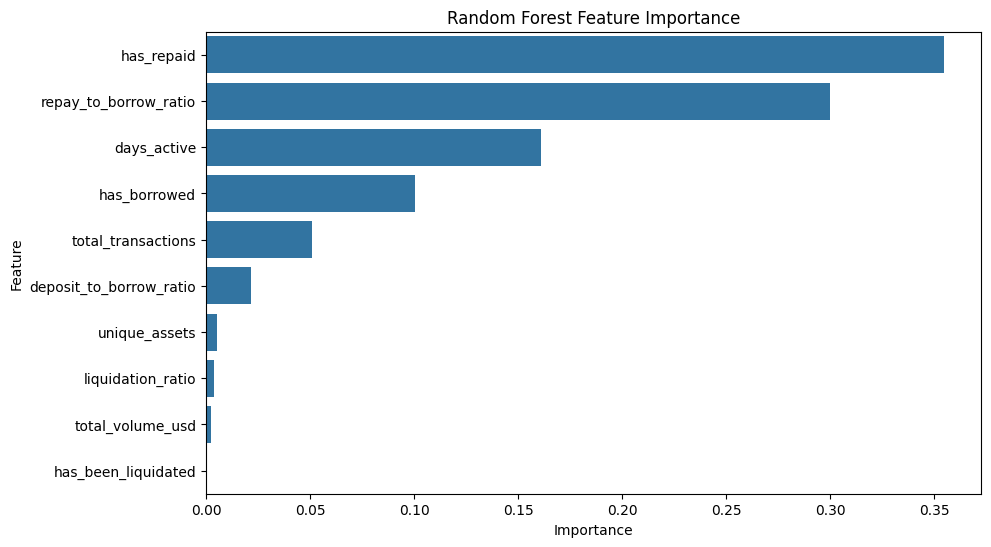

In [13]:
#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf_model)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [15]:
# Feature importance for XGBoost

xgboost_model = models['XGBoost']
feature_importance_xgboost = pd.DataFrame({
    'feature': feature_columns,
    'importance': xgboost_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance_xgboost.head(10))


XGBoost Feature Importance:
                   feature  importance
3    repay_to_borrow_ratio    0.564829
5             has_borrowed    0.339430
2              days_active    0.037110
7      has_been_liquidated    0.016227
4  deposit_to_borrow_ratio    0.014511
0       total_transactions    0.014332
9        liquidation_ratio    0.007793
1            unique_assets    0.005282
8         total_volume_usd    0.000487
6               has_repaid    0.000000


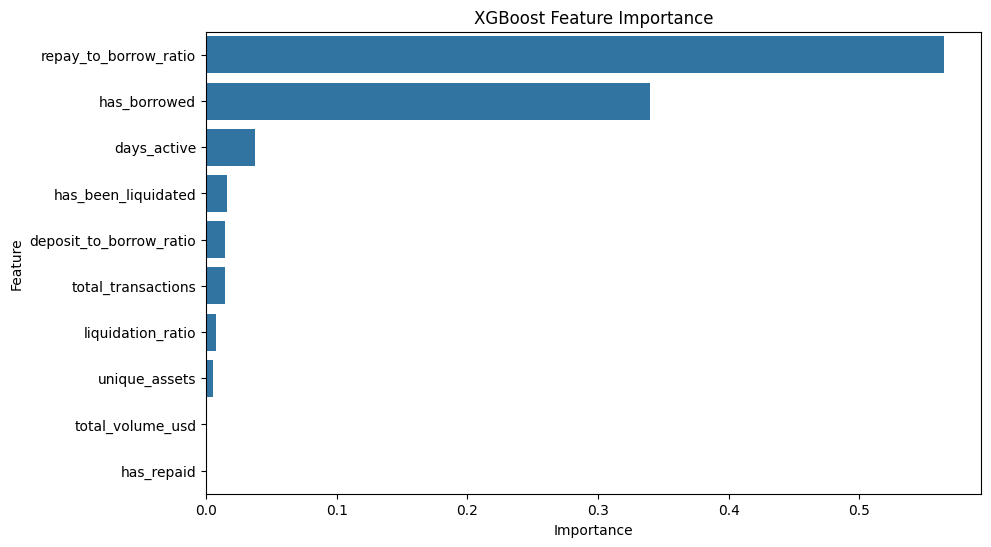

In [16]:
#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_xgboost)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [17]:
catboost_model = models['CatBoost']
feature_importance_catboost = pd.DataFrame({
    'feature': feature_columns,
    'importance': catboost_model.get_feature_importance()
}).sort_values('importance', ascending=False)

print("\nCatBoost Feature Importance:")
print(feature_importance_catboost.head(10))


CatBoost Feature Importance:
                   feature  importance
3    repay_to_borrow_ratio   26.458084
5             has_borrowed   25.151770
6               has_repaid   18.240391
2              days_active   14.001551
0       total_transactions    6.556909
4  deposit_to_borrow_ratio    4.327452
1            unique_assets    3.632613
8         total_volume_usd    0.892721
9        liquidation_ratio    0.653342
7      has_been_liquidated    0.085168


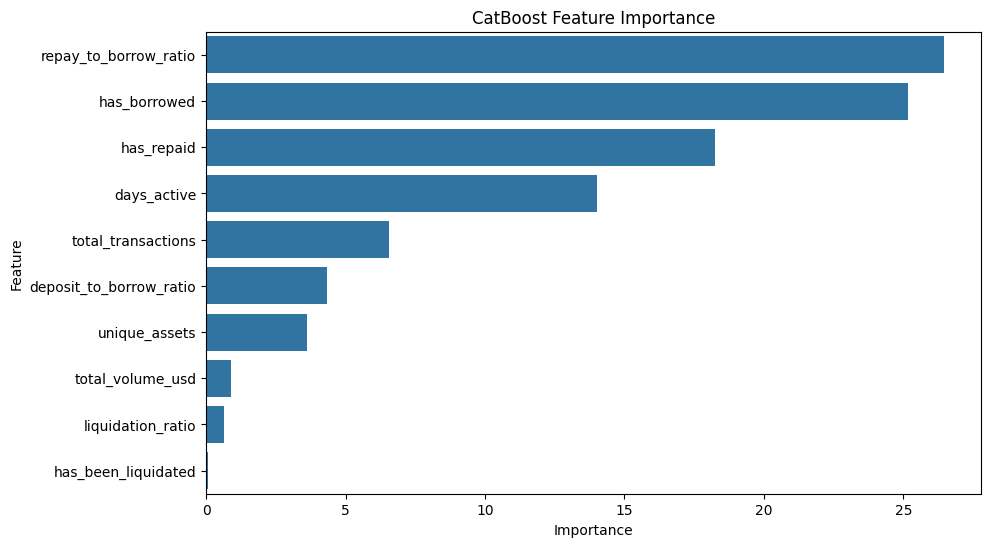

In [18]:
#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_catboost)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
# Save results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'CatBoost'],
    'MSE': [results['Random Forest']['MSE'], results['XGBoost']['MSE'], results['CatBoost']['MSE']],
    'RMSE': [results['Random Forest']['RMSE'], results['XGBoost']['RMSE'], results['CatBoost']['RMSE']],
    'MAE': [results['Random Forest']['MAE'], results['XGBoost']['MAE'], results['CatBoost']['MAE']],
    'R2': [results['Random Forest']['R2'], results['XGBoost']['R2'], results['CatBoost']['R2']]
})

In [ ]:
results_df.to_csv('output/ml_model_results.csv', index=False)
feature_importance_catboost.to_csv('output/feature_importance.csv', index=False)

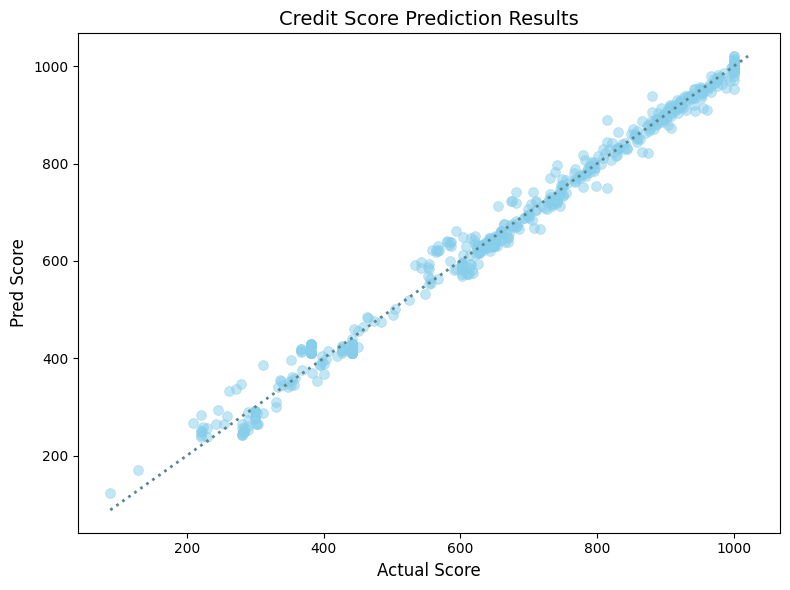

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, s=50, color='skyblue', alpha=0.5, edgecolor=None)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='dotted', color='#5D878F', linewidth=2)

# Labels and title
plt.title("Credit Score Prediction Results", fontsize=14)
plt.xlabel("Actual Score", fontsize=12)
plt.ylabel("Pred Score", fontsize=12)

# Format ticks as integers with commas
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='both')

# Layout and save
plt.tight_layout()
plt.savefig("output/credit_score_pred_scatter_seaborn.png", dpi=300)
plt.show()